Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility. This feature will help bring more attention to newer apps that have the potential.


#Importing the Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset
df = pd.read_csv("googleplaystore.csv")
df

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4.5,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up
10837,NaN,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


#Shape & columns in dataFrame

In [3]:
df.shape

(10840, 13)

In [4]:
df.columns

Index(['Rating', 'App', 'Category', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#Null Values

In [5]:
#check null values
df.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
#check columnwise null values %
df.isnull().sum()/df.shape[0]*100

Rating            13.597786
App                0.000000
Category           0.000000
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073801
Android Ver        0.018450
dtype: float64

#DataTypes

In [7]:
#check datatypes
df.dtypes

Rating            float64
App                object
Category           object
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<Axes: >

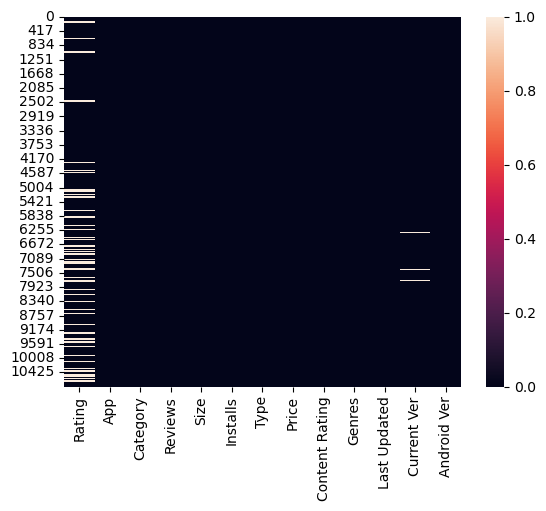

In [8]:
#visualize null values
sns.heatmap(df.isnull())

#Handle Null values

In [9]:
mean = df['Rating'].mean()
mean
df['Rating'].fillna(mean,inplace=True)

#Drop Records with Null values

In [10]:
df.dropna(inplace=True,axis=0)

In [11]:
df.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
df['Type'].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

In [13]:
df['Content Rating'].value_counts()

Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [14]:
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

#Correct Price Data & then change data types

In [15]:
df['Price'] = df['Price'].map(lambda x : x.lstrip('$'))

In [16]:
df['Price']=df['Price'].astype('float')

In [17]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

#Unique Values in size

In [18]:
df['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

#Correct Data Types --as its contains values with different units

In [19]:
df['Size']=df['Size'].map(lambda x : x.rstrip('M'))

In [20]:
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201k', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '23k', '6.5', '1.5', '7.5', '51',
       '41', '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8',
       '8.8', '6.6', '5.1', '61', '66', '79k', '8.4', '118k', '44',
       '695k', '1.6', '6.2', '18k', '53', '1.4', '3.0', '5.8', '3.8',
       '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9', '9.3',
  

#Keep all values of size in single unit

In [21]:
df['Size']= df['Size'].map(lambda x : str(round(float(x.rstrip('k'))/1024,1)) if x[-1]=='k' else x)

In [22]:
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '0.0', '6.5', '1.5', '7.5', '51',
       '41', '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8',
       '8.8', '6.6', '5.1', '61', '66', '0.1', '8.4', '44', '0.7', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36'

In [23]:
df[df['Size']=="Varies with device"]

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,4.1,Floor Plan Creator,ART_AND_DESIGN,36639,Varies with device,"5,000,000+",Free,0.0,Everyone,Art & Design,14-Jul-18,Varies with device,2.3.3 and up
42,4.4,Textgram - write on photos,ART_AND_DESIGN,295221,Varies with device,"10,000,000+",Free,0.0,Everyone,Art & Design,30-Jul-18,Varies with device,Varies with device
52,4.6,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,17057,Varies with device,"1,000,000+",Free,0.0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
67,4.3,Ulysse Speedometer,AUTO_AND_VEHICLES,40211,Varies with device,"5,000,000+",Free,0.0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
68,3.9,REPUVE,AUTO_AND_VEHICLES,356,Varies with device,"100,000+",Free,0.0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10712,4.4,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,3471,Varies with device,"100,000+",Free,0.0,Everyone,Weather,24-Jul-18,Varies with device,Varies with device
10724,3.6,Posta App,MAPS_AND_NAVIGATION,8,Varies with device,"1,000+",Free,0.0,Everyone,Maps & Navigation,27-Sep-17,Varies with device,4.4 and up
10764,3.4,Chat For Strangers - Video Chat,SOCIAL,622,Varies with device,"100,000+",Free,0.0,Mature 17+,Social,23-May-18,Varies with device,Varies with device
10825,4.0,Frim: get new friends on local chat rooms,SOCIAL,88486,Varies with device,"5,000,000+",Free,0.0,Mature 17+,Social,23-Mar-18,Varies with device,Varies with device


In [24]:
df[df['Size']!="Varies with device"]['Size'].astype(float).mean()

21.534570333880676

In [25]:
df['Size'].replace("Varies with device",21.53,inplace=True)

#data correction of install feature

In [26]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [27]:
df['Installs']= df['Installs'].map(lambda x : x.rstrip('+'))

In [28]:
df['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [29]:
df['Installs']=df['Installs'].map(lambda x: ''.join(x.split(',')))

#Change data types

In [30]:
df['Installs']=df['Installs'].astype(int)
df['Installs'].dtype

dtype('int32')

In [31]:
df.dtypes


Rating            float64
App                object
Category           object
Reviews             int64
Size               object
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
df['Reviews']=df['Reviews'].astype(int)
df['Size']=df['Size'].astype(float)

In [33]:
df.dtypes

Rating            float64
App                object
Category           object
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [34]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

#Drop Unwanted features

In [35]:
df.drop(["Last Updated","Current Ver","Android Ver","Genres"],inplace=True,axis=1)

In [36]:
df

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,4.100000,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.00,10000,Free,0.0,Everyone
1,3.900000,Coloring book moana,ART_AND_DESIGN,967,14.00,500000,Free,0.0,Everyone
2,4.700000,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.70,5000000,Free,0.0,Everyone
3,4.500000,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.00,50000000,Free,0.0,Teen
4,4.300000,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.80,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
10835,4.500000,Sya9a Maroc - FR,FAMILY,38,53.00,5000,Free,0.0,Everyone
10836,5.000000,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.60,100,Free,0.0,Everyone
10837,4.191757,Parkinson Exercices FR,MEDICAL,3,9.50,1000,Free,0.0,Everyone
10838,4.500000,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,21.53,1000,Free,0.0,Mature 17+


In [37]:
df['Rating']=df['Rating'].round(1)
df['Size']=df['Size'].round(1)

#final df after EDA

In [38]:
df


,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000,Free,0.0,Everyone
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14.0,500000,Free,0.0,Everyone
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000,Free,0.0,Everyone
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,50000000,Free,0.0,Teen
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
10835,4.5,Sya9a Maroc - FR,FAMILY,38,53.0,5000,Free,0.0,Everyone
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6,100,Free,0.0,Everyone
10837,4.2,Parkinson Exercices FR,MEDICAL,3,9.5,1000,Free,0.0,Everyone
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,21.5,1000,Free,0.0,Mature 17+


Visualization

#Statistics info

In [39]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10829.000000,1.082900e+04,10829.000000,1.082900e+04,10829.000000
mean,4.192945,4.446018e+05,21.529162,1.547990e+07,1.028091
std,0.479046,2.929213e+06,20.751524,8.507114e+07,15.957778
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.900000,5.000000e+03,0.000000
50%,4.200000,2.100000e+03,18.000000,1.000000e+05,0.000000
75%,4.500000,5.481500e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [40]:
df['Content Rating'].value_counts()

Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

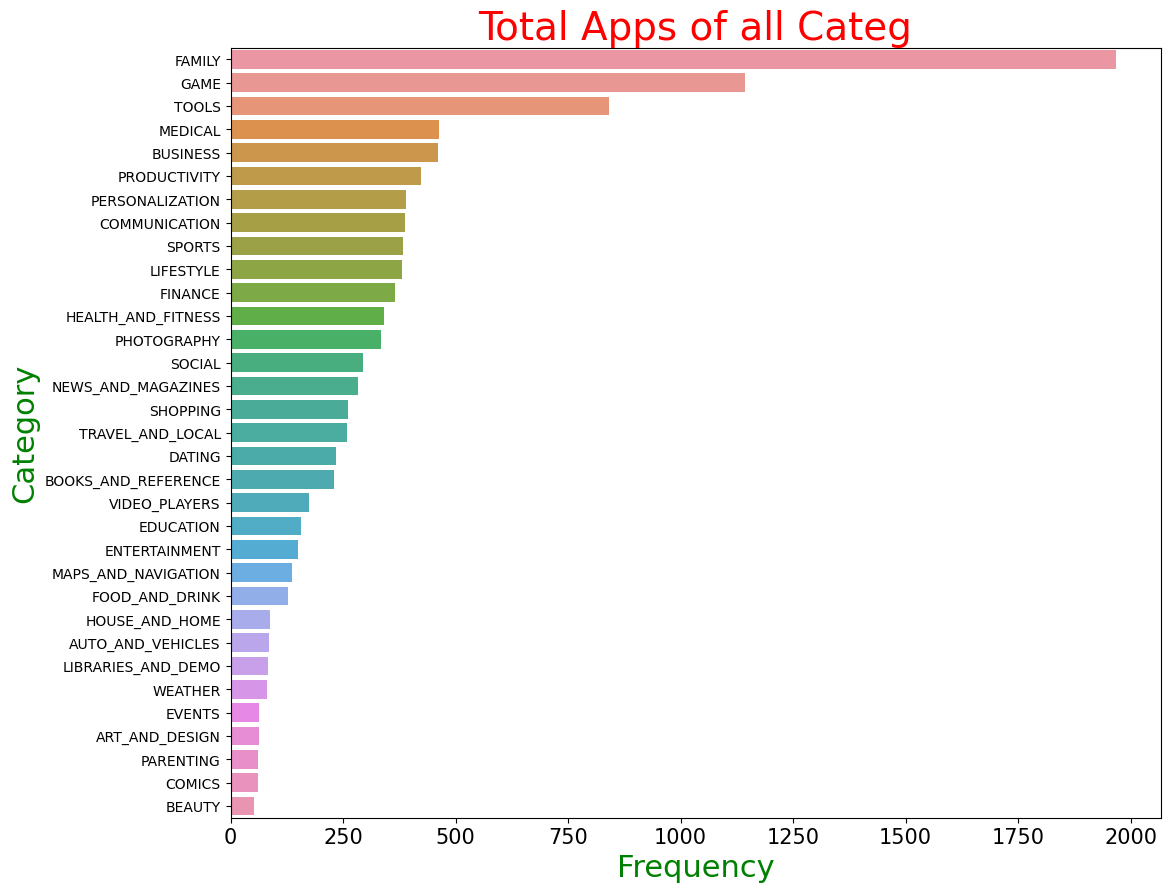

In [41]:
plt.figure(figsize=(12,10))
most_cat = df['Category'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df)
plt.xticks(size=15)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Category",size=22,c="g")
plt.title("Total Apps of all Categ",size=28,c="r")
plt.show()

-> There are more kinds of apps in playstore which are under categ of family, games & tools.
-> Arts, weather,beatuty,comics kinds of apps are very less in playstore.

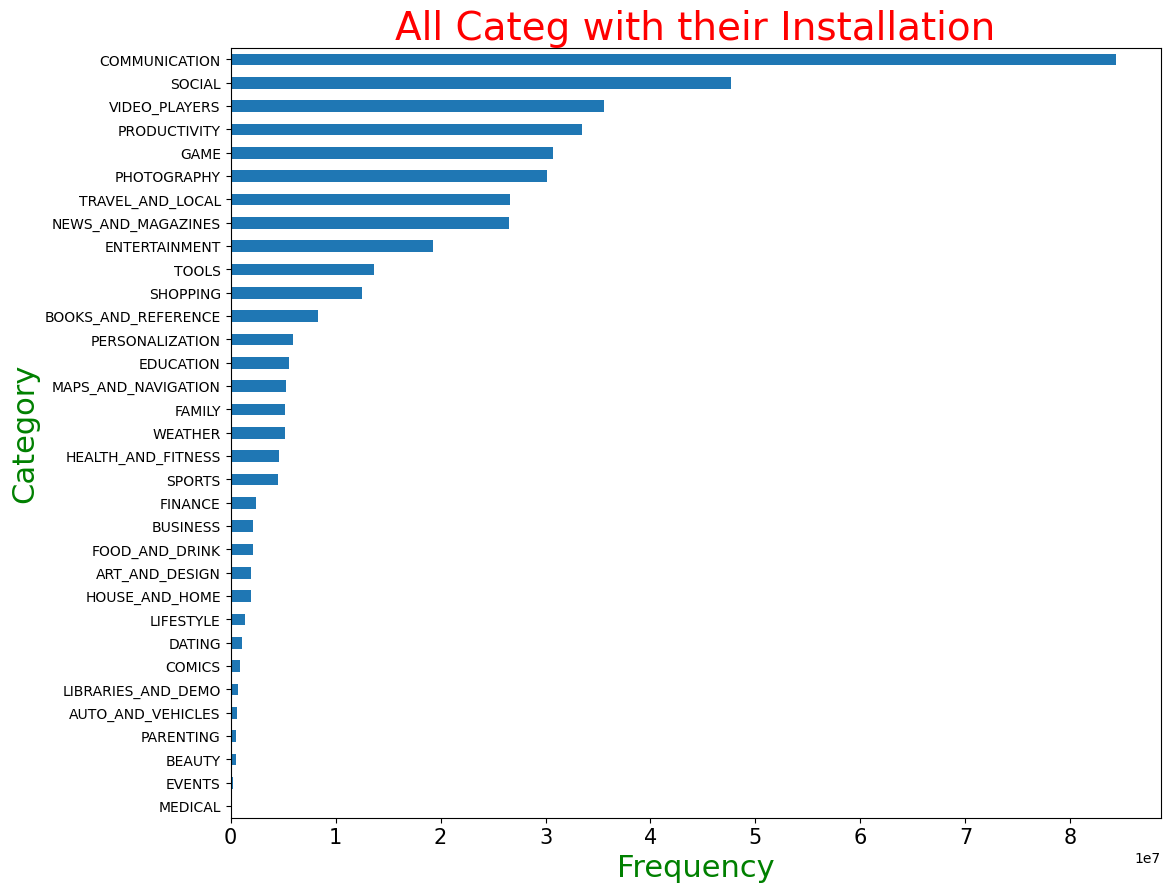

In [42]:
print()
plt.figure(figsize=(12,10))
df.groupby('Category')['Installs'].mean().round(0).sort_values(ascending=True).plot(kind="barh")
plt.xticks(size=15)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Category",size=22,c="g")
plt.title("All Categ with their Installation",size=28,c="r")
plt.show()

-> community & social types of apps are most installed by users which was very highest rate follwed by games, productivity.
-> Arts, weather,beatuty,comics kinds of apps are very less in playstore also their avalibilty & installation is also very very less.

In [43]:
df.Category.value_counts()[df.Category.value_counts()<250]

DATING                 234
BOOKS_AND_REFERENCE    230
VIDEO_PLAYERS          175
EDUCATION              156
ENTERTAINMENT          149
MAPS_AND_NAVIGATION    137
FOOD_AND_DRINK         127
HOUSE_AND_HOME          88
AUTO_AND_VEHICLES       85
LIBRARIES_AND_DEMO      84
WEATHER                 82
EVENTS                  64
ART_AND_DESIGN          64
PARENTING               60
COMICS                  60
BEAUTY                  53
Name: Category, dtype: int64

-> highest top categ

In [44]:
df.groupby('Category', as_index=False)['Reviews'].mean().round(0)

,Category,Reviews
0,ART_AND_DESIGN,26787.0
1,AUTO_AND_VEHICLES,13690.0
2,BEAUTY,7476.0
3,BOOKS_AND_REFERENCE,95474.0
4,BUSINESS,30336.0
5,COMICS,56388.0
6,COMMUNICATION,2107138.0
7,DATING,31159.0
8,EDUCATION,253819.0
9,ENTERTAINMENT,397169.0


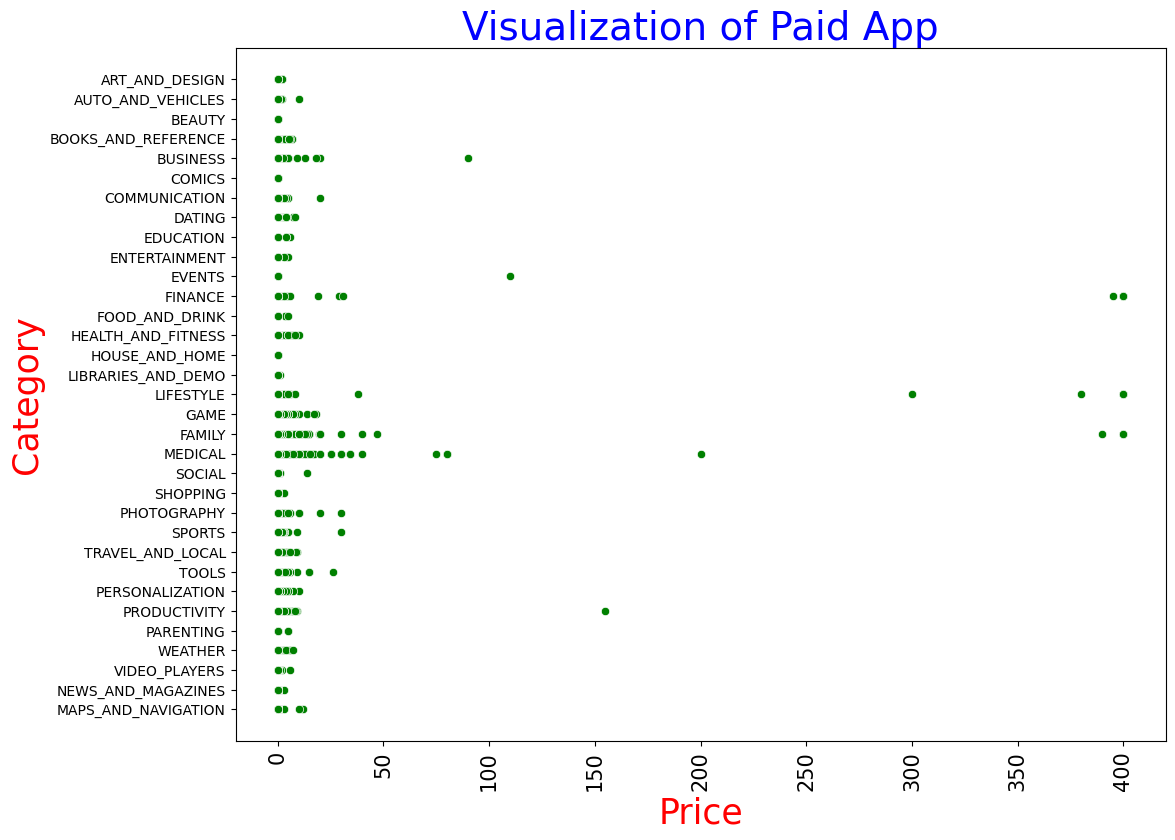

In [45]:
plt.figure(figsize=(12,9)) 
sns.scatterplot(data=df,y="Category",x='Price',color="g")
plt.xticks(rotation='vertical',size=15)
plt.xlabel("Price",size=25,c="r")
plt.ylabel("Category",size=25,c="r")
plt.title("Visualization of Paid App",size=28,c="b")
plt.show()

-> There are few Apps related to finance games and lifestyle are costly in paid categ apps
-> Paid apps are very very less
-> 0 indicate free apps

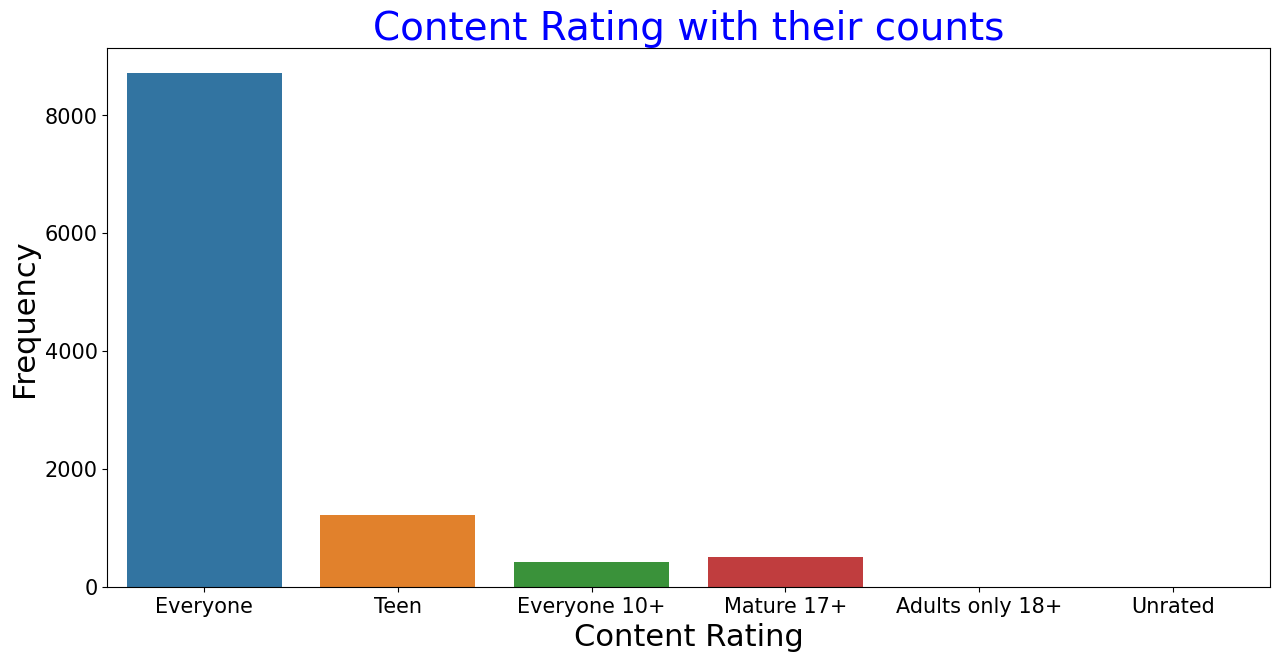

In [46]:
plt.figure(figsize=(15,7))

sns.countplot(x="Content Rating",data=df)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Content Rating",size=22,c="k")
plt.ylabel("Frequency",size=22,c="k")
plt.title("Content Rating with their counts",size=28,c="b")
plt.show()

-> There is highest counts of everyone categ as compared others follwed by Teen

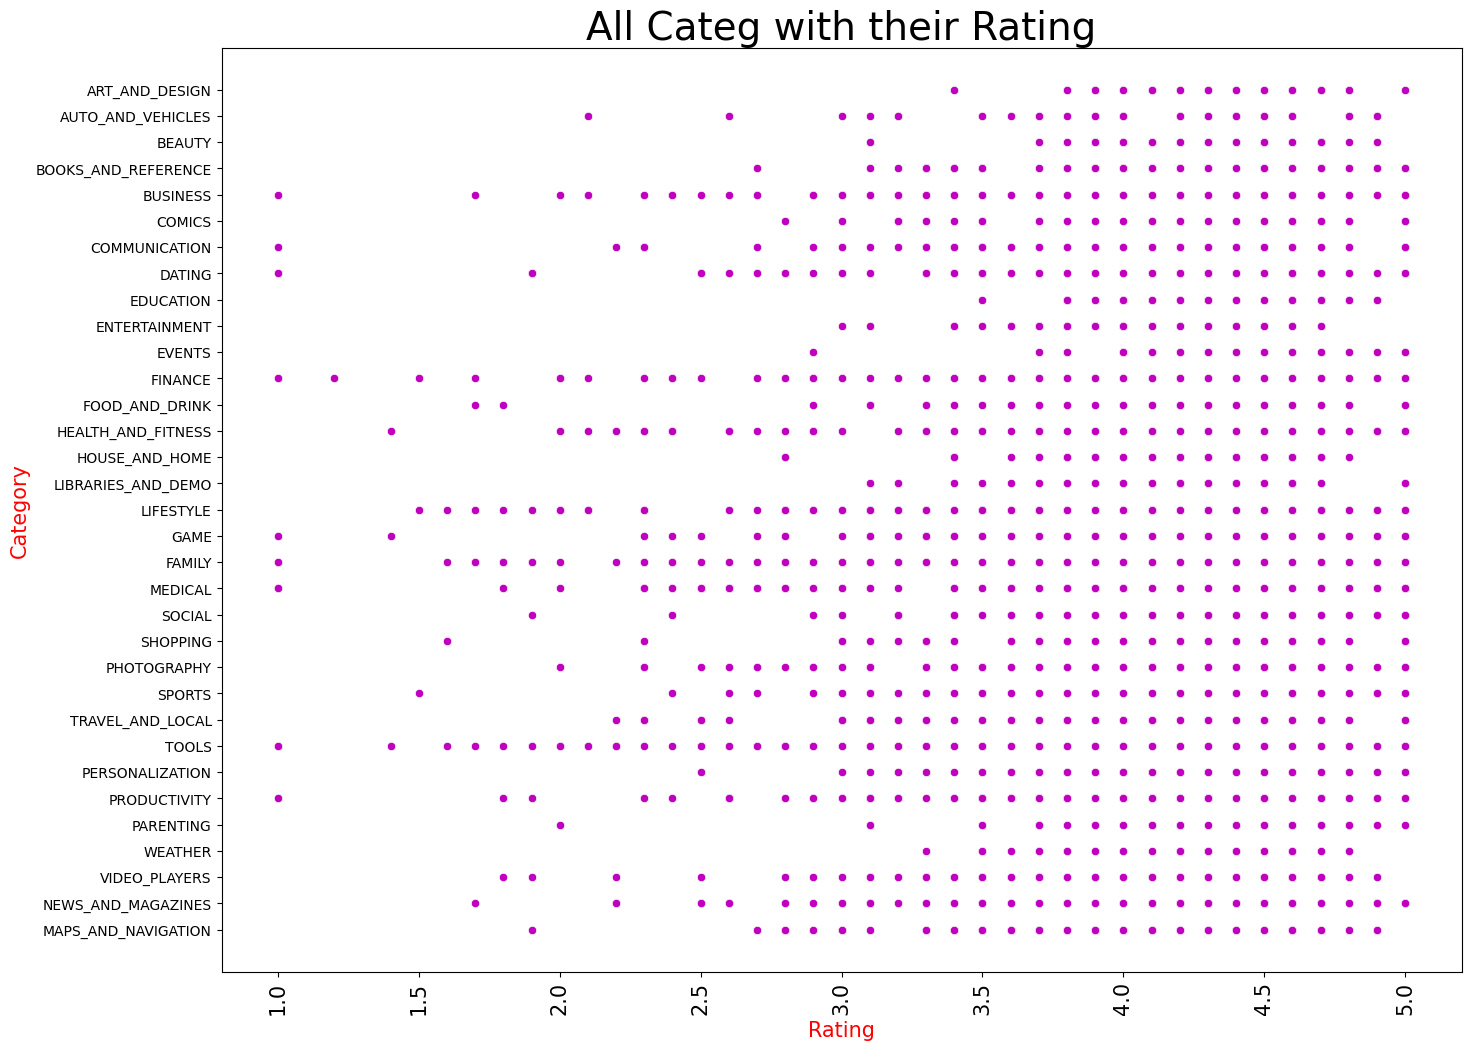

In [47]:
plt.figure(figsize=(16,12)) 
sns.scatterplot(data=df,y="Category",x='Rating',color="m")
plt.xticks(rotation='vertical',size=15)
plt.xlabel("Rating",size=15,c="r")
plt.ylabel("Category",size=15,c="r")
plt.title("All Categ with their Rating",size=28,c="k")
plt.show()

-> as seen here there are only few categ apps having some reviews less than 1.5 which is very bad
-> these are business, communication, games, family, medical, finance, & helath

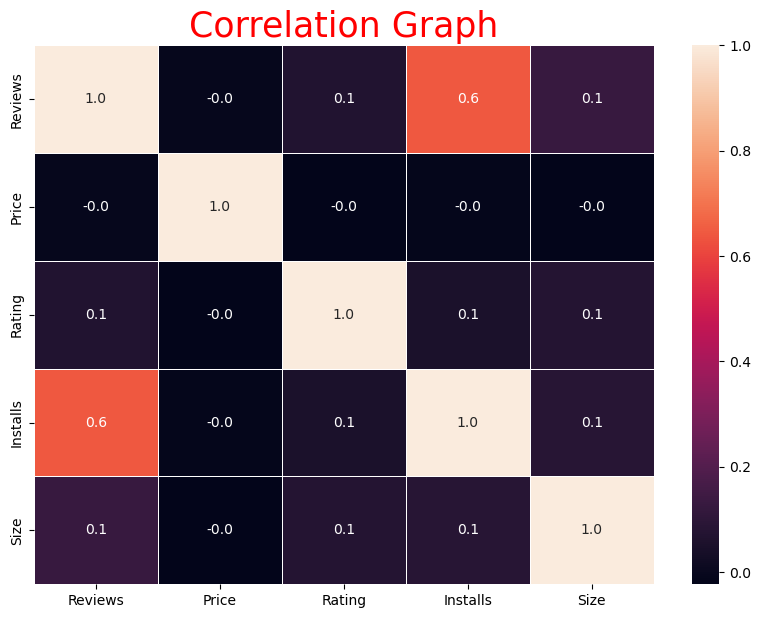

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(df[["Reviews","Price","Rating","Installs","Size"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

-> As seen here with heatmap, reviews and Installs has good relation
-> More the Reviews more the installation no of apps
-> means users see review and total installtaion before installling
-> There is no realtion of no of installation & Reviews with price

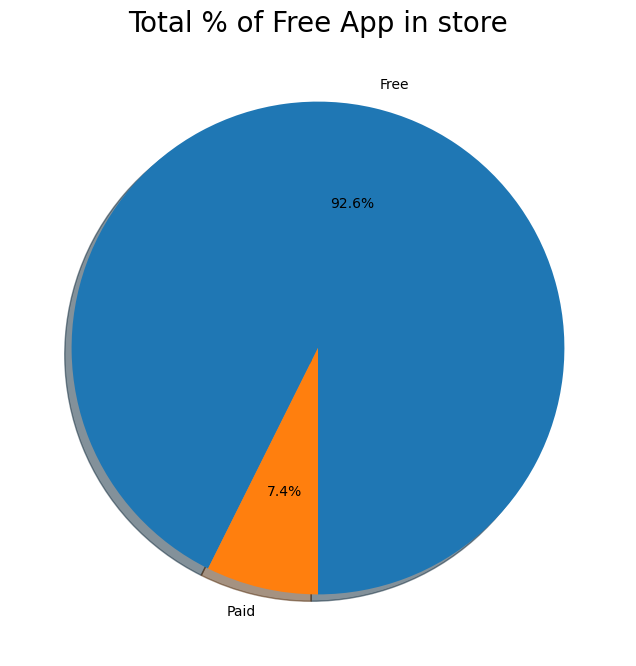

In [49]:
plt.figure(figsize=(8,8))
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total % of Free App in store',size = 20)
plt.show()

-> Free apps are very much more than Paid apps
-> 92% apps are free
-> users always prefer to install free apps

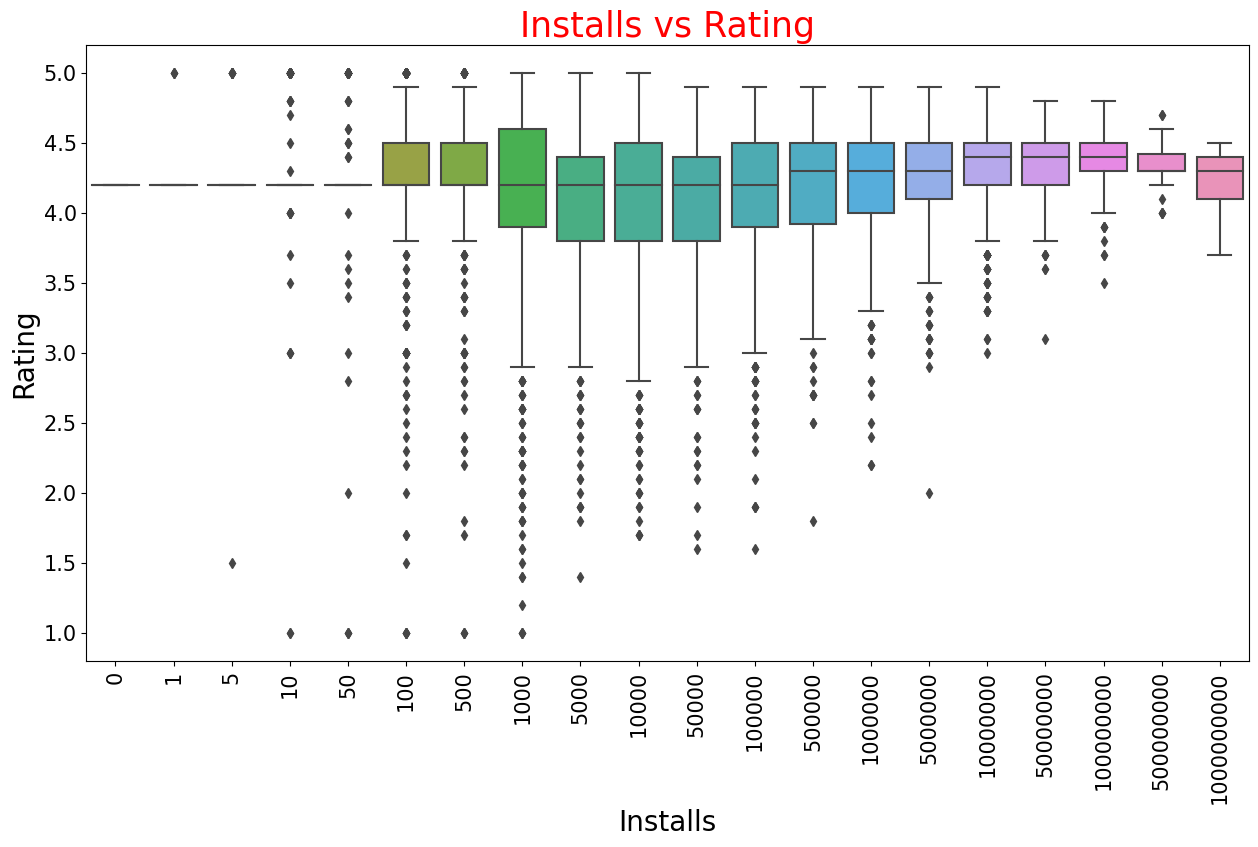

In [50]:
#boxplot plot installs/rates
ax = plt.figure(figsize=(15,8))
sns.boxplot(x="Installs", y="Rating", data=df)
plt.title("Installs vs Rating",size=25,c="r")
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
plt.xlabel("Installs",size=20)
plt.ylabel("Rating",size=20)
plt.show()

-> avg rating of all apps is between 3 to 4.5 which is very good.
-> Highly installed apps having rating is also good.

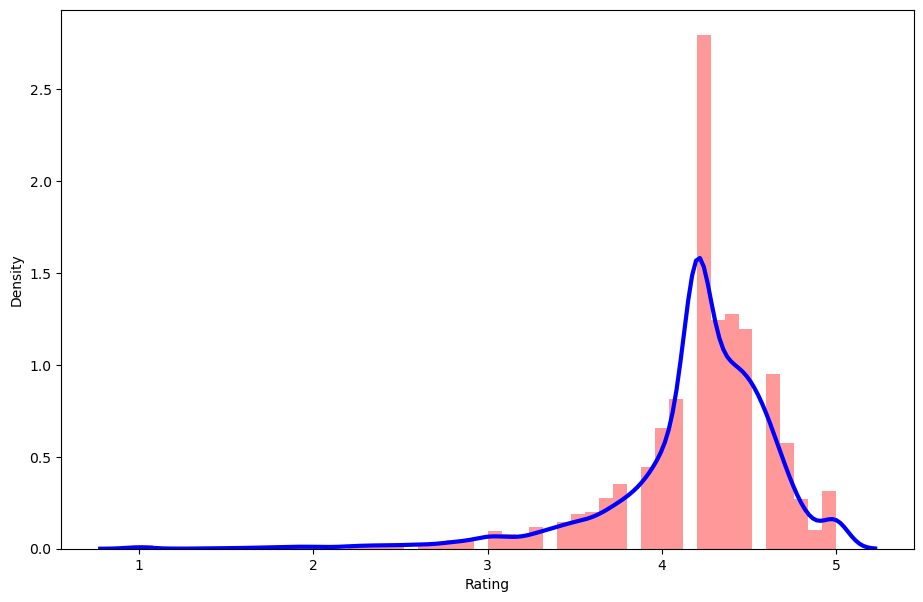

In [51]:
plt.figure(figsize=(11,7))
plt.subplot(1,1,1)
sns.distplot(df['Rating'],color='r',kde_kws={'linewidth':3,'color':'b'});
plt.show()

-> As seen distribution of Rating apps

0 Rating
1 Size
2 Price


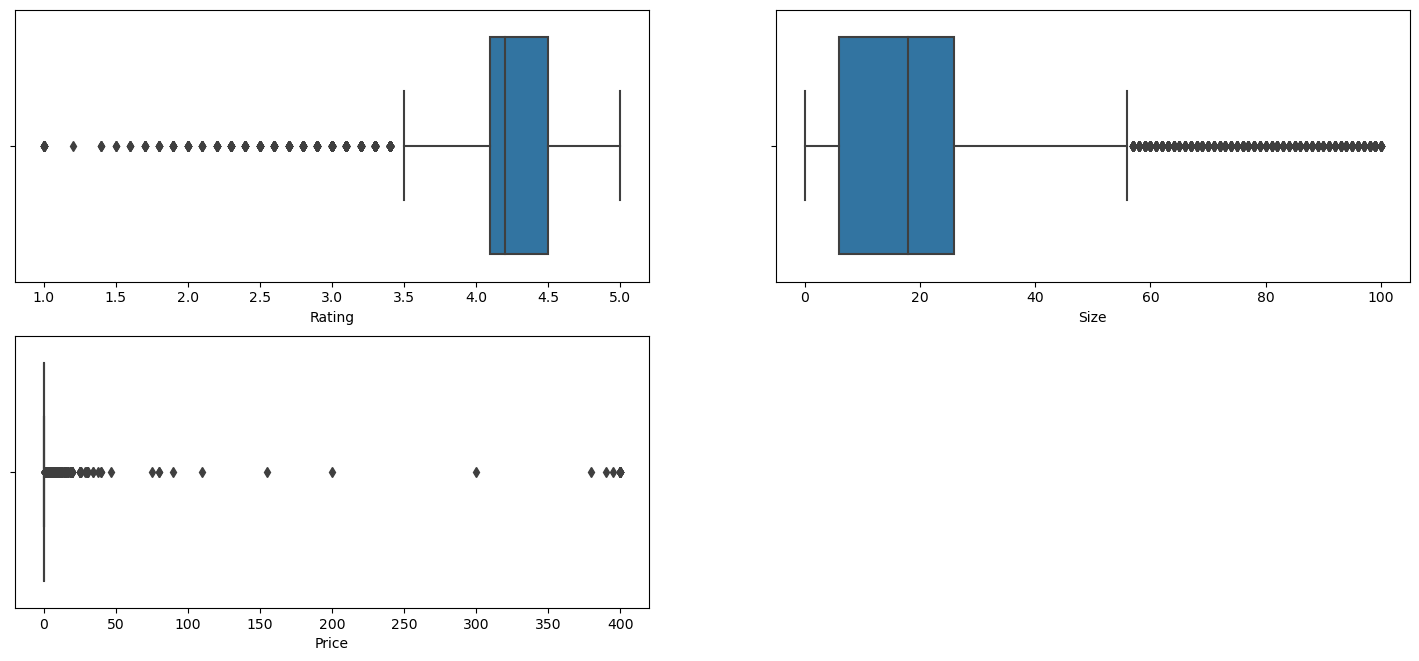

In [52]:
col = ['Rating','Size','Price'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df)
plt.show()

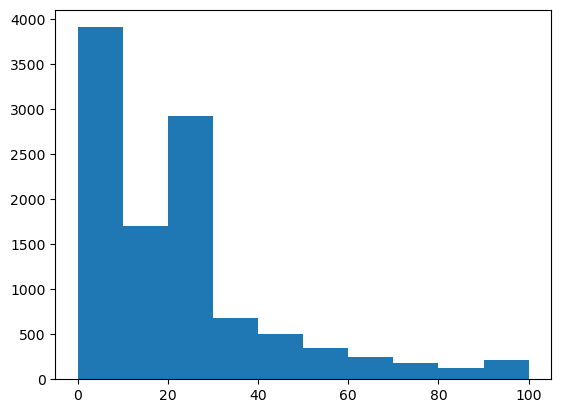

In [53]:
plt.hist(df['Size'])
plt.show()

-> Distribution of app size feature as seen most of apps has size between 0-30 M

Text(0.5, 1.0, 'Avg Price of all Categories')

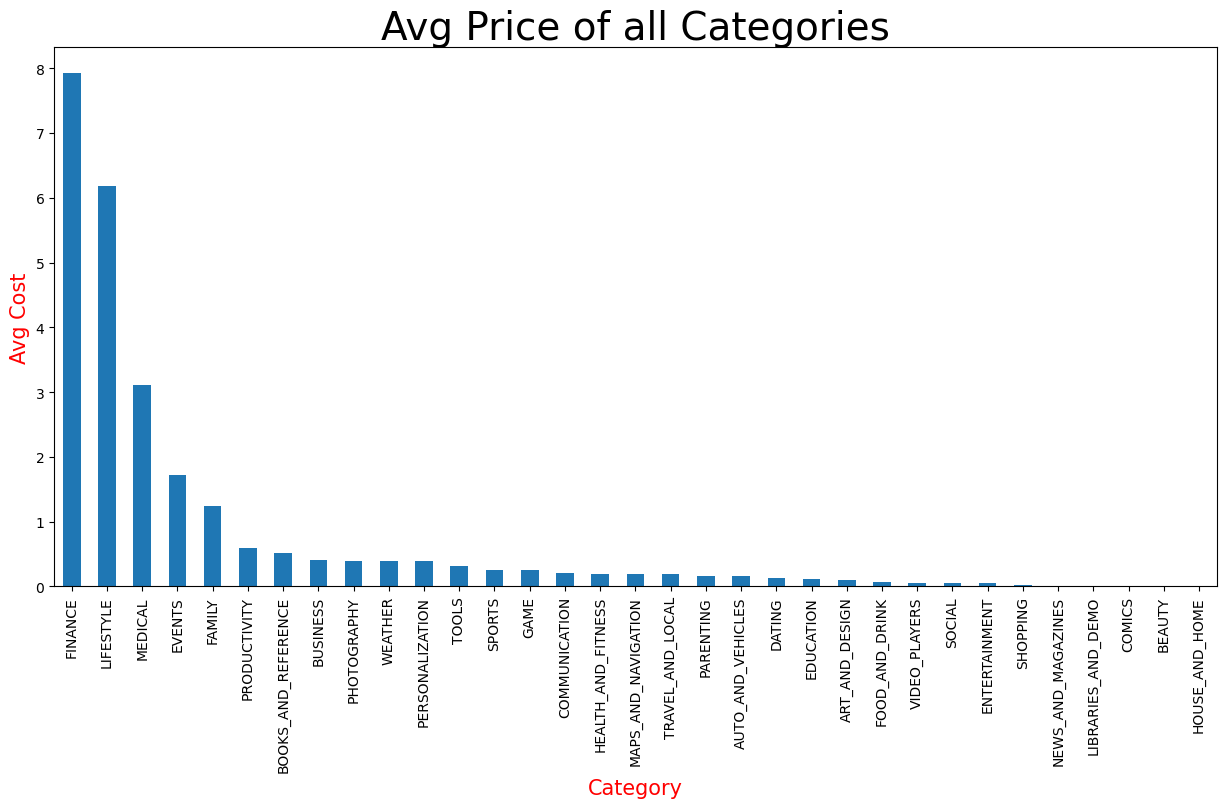

In [54]:
plt.figure(figsize=(15,7))
df.groupby("Category")['Price'].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Category",size=15,c="r")
plt.ylabel("Avg Cost",size=15,c="r")
plt.title("Avg Price of all Categories",size=28,c="k")

-> apps whcih are related to finance, lifestyle, medical and events has highest avg cost than others